In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [14]:
data = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\nmn_sc.csv')
data.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,0.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,0.0


In [15]:
features = ['line item quantity', 'line item value']
X = data[features]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)


In [18]:
y_pred = lof.fit_predict(X_scaled)

In [19]:
is_anomaly = y_pred == -1

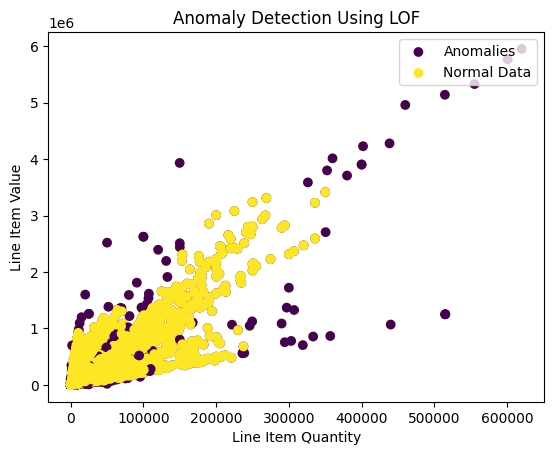

In [20]:
plt.scatter(X['line item quantity'], X['line item value'], c=is_anomaly, cmap='viridis', label='Anomalies')
plt.scatter(X['line item quantity'], X['line item value'], c=np.logical_not(is_anomaly), cmap='viridis', label='Normal Data')
plt.xlabel('Line Item Quantity')
plt.ylabel('Line Item Value')
plt.title('Anomaly Detection Using LOF')
plt.legend(loc='upper right')
plt.show()


In [21]:
anomalies = data[is_anomaly]
print("Anomalies:")
print(anomalies)

Anomalies:
          id project code            pq #   po / so #  asn/dn #  \
12        62   102-NG-T01  Pre-PQ Process    SCMS-230   ASN-144   
15        68   113-ZW-T01  Pre-PQ Process    SCMS-308   ASN-285   
26       134   100-HT-T01  Pre-PQ Process  SCMS-10130   ASN-616   
30       161   117-ET-T01  Pre-PQ Process  SCMS-11070   ASN-916   
35       284   107-RW-T01  Pre-PQ Process  SCMS-14630  ASN-1253   
...      ...          ...             ...         ...       ...   
10242  86675   104-CI-T30       FPQ-12800    SO-46431   DN-3638   
10280  86747   107-RW-T30       FPQ-14111    SO-48790   DN-4012   
10285  86772   151-NG-T30       FPQ-14156    SO-48908   DN-4097   
10289  86782   111-MZ-T30       FPQ-15195    SO-50121   DN-4153   
10321  86821   110-ZM-T30       FPQ-14784    SO-49600   DN-4316   

             country managed by  fulfill via vendor inco term shipment mode  \
12           Nigeria   PMO - US  Direct Drop              EXW           Air   
15          Zimbabwe   PMO

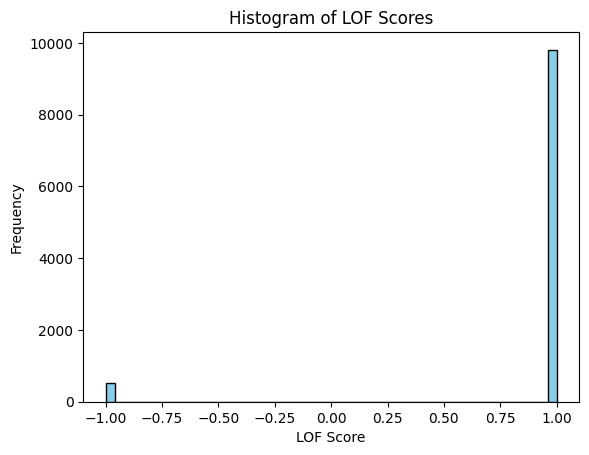

In [22]:
plt.hist(y_pred, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.title('Histogram of LOF Scores')
plt.show()

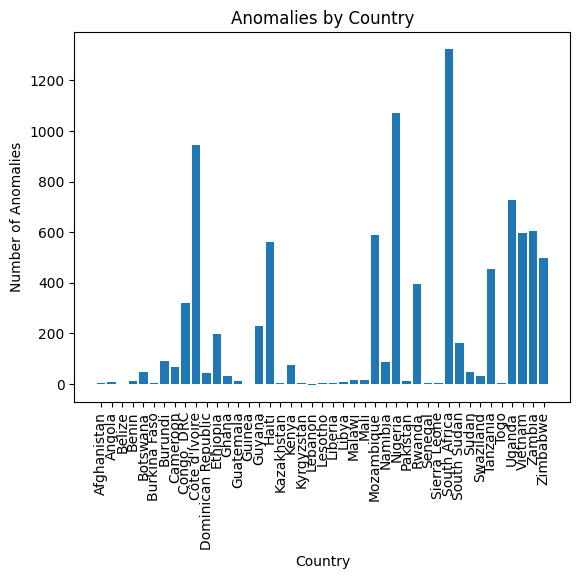

In [23]:
data['Anomaly'] = y_pred  # Assuming y_pred contains anomaly labels
anomaly_counts = data.groupby('country')['Anomaly'].sum().reset_index()
plt.bar(anomaly_counts['country'], anomaly_counts['Anomaly'])
plt.xlabel('Country')
plt.ylabel('Number of Anomalies')
plt.title('Anomalies by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()


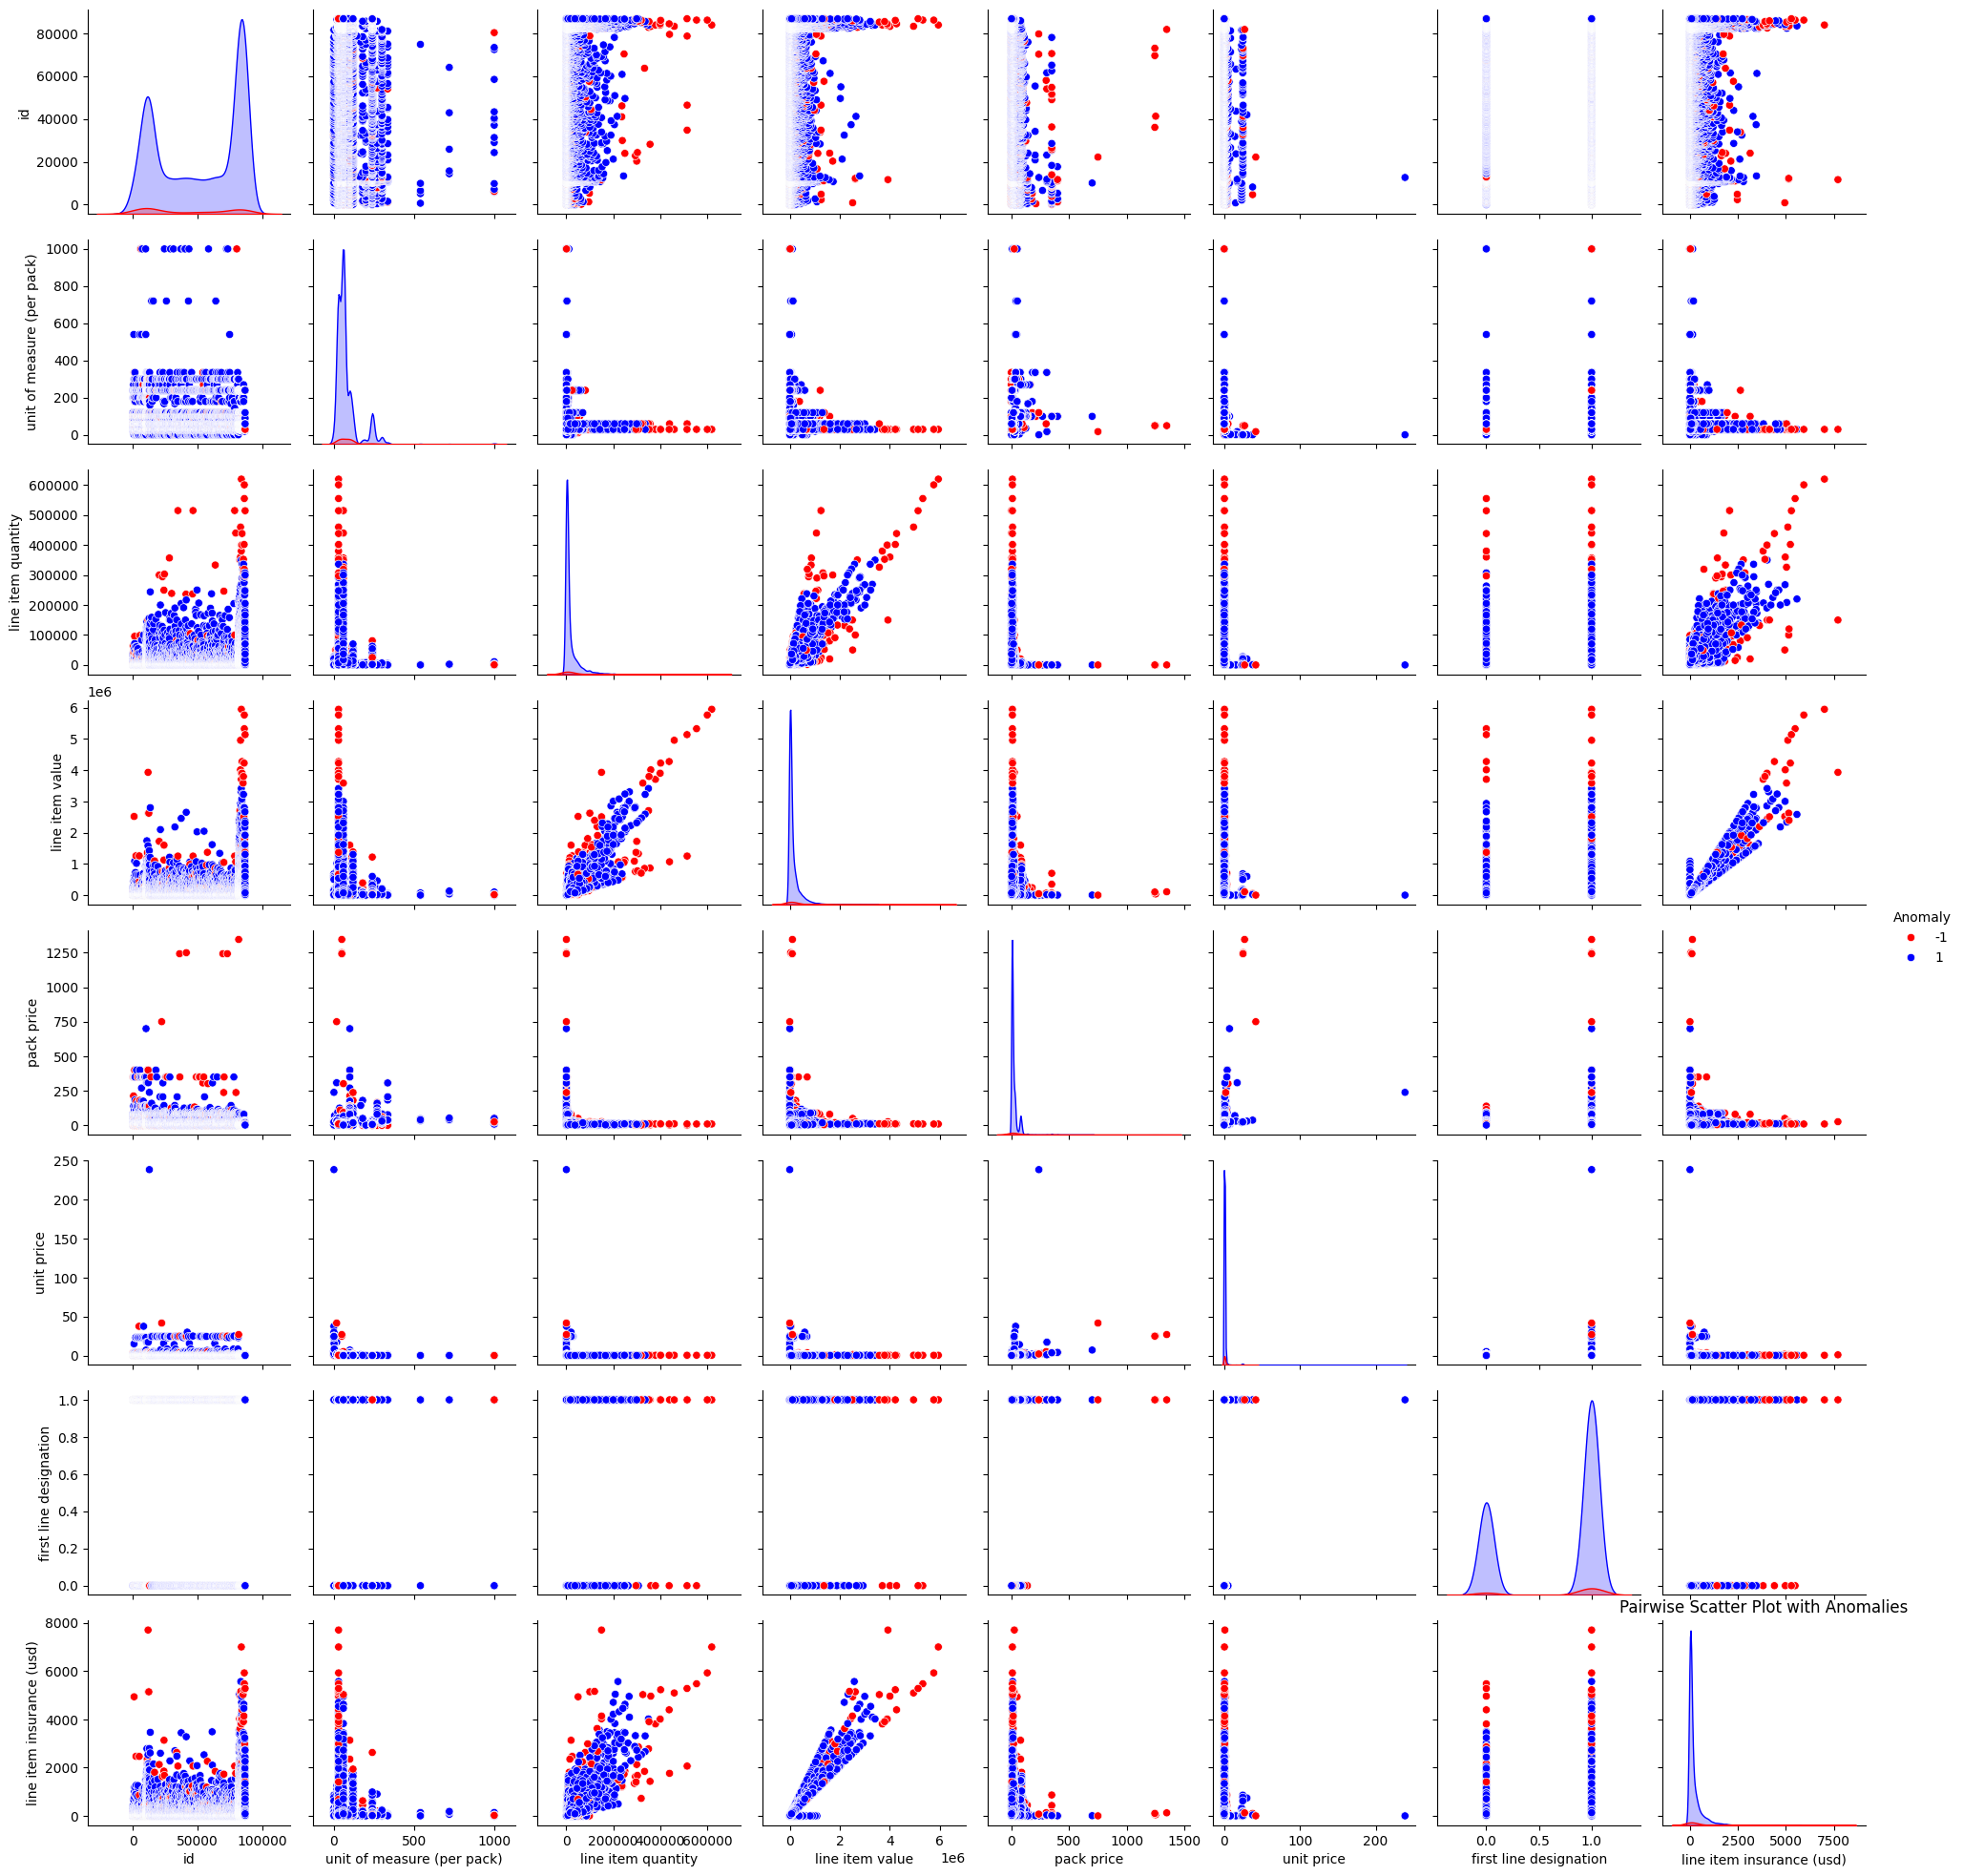

In [24]:
import seaborn as sns
sns.pairplot(data, hue='Anomaly', palette={-1: 'red', 1: 'blue'})
plt.title('Pairwise Scatter Plot with Anomalies')
plt.show()
